# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | rio grande
Processing Record 6 of Set 1 | moranbah
Processing Record 7 of Set 1 | polyarnyy
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | santana
Processing Record 10 of Set 1 | veraval
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | pamanukan
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | aykhal
Processing Record 17 of Set 1 | holualoa
Processing Record 18 of Set 1 | conduaga
Processing Record 19 of Set 1 | obo
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | nasirabad


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,55.99,94,0,4.47,RU,1689969334
1,tiksi,71.6872,128.8694,45.37,67,22,7.90,RU,1689969334
2,edinburgh of the seven seas,-37.0676,-12.3116,53.91,61,100,16.93,SH,1689969334
3,bethel,41.3712,-73.4140,84.88,67,20,12.66,US,1689969288
4,rio grande,-32.0350,-52.0986,77.11,87,8,14.29,BR,1689969335


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,55.99,94,0,4.47,RU,1689969334
1,tiksi,71.6872,128.8694,45.37,67,22,7.90,RU,1689969334
2,edinburgh of the seven seas,-37.0676,-12.3116,53.91,61,100,16.93,SH,1689969334
3,bethel,41.3712,-73.4140,84.88,67,20,12.66,US,1689969288
4,rio grande,-32.0350,-52.0986,77.11,87,8,14.29,BR,1689969335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

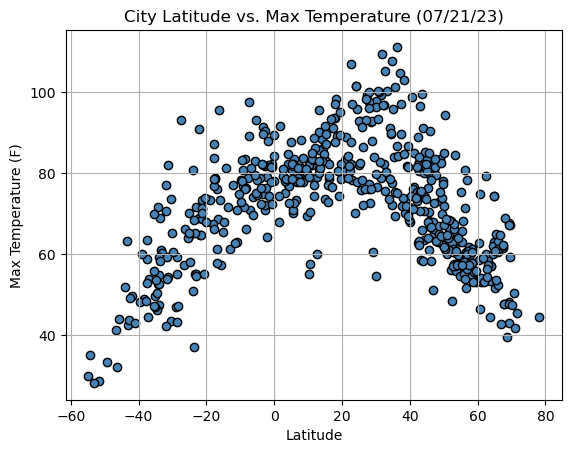

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True) 


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

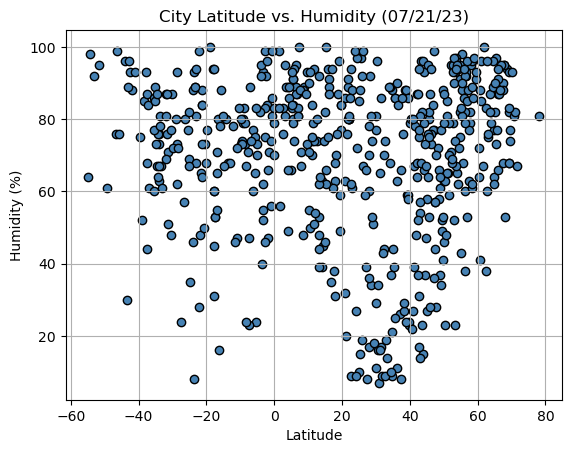

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

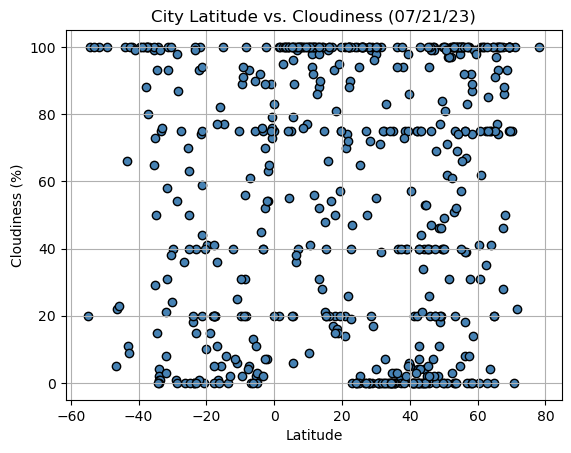

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

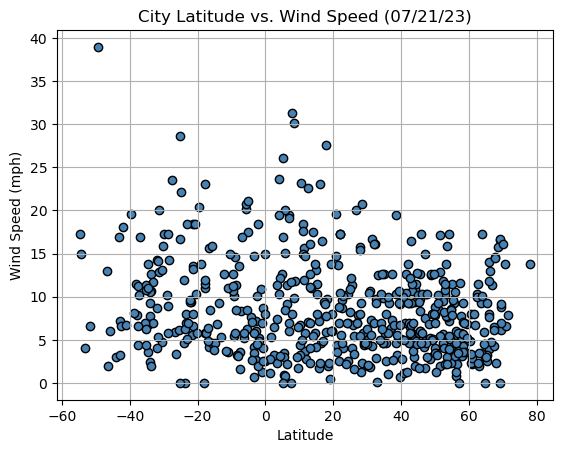

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
        # scatter plot and plot the line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
    
        #calculate position for the text in the graph
        x_text = x_values.min() + 10
        y_text = y_values.min() + 5
        plt.annotate(line_eq,(x_text,y_text),fontsize=15,color="red")
    
        # Labeling
        plt.xlabel(x_name)
        plt.ylabel(y_name)

        # Print r square value
        print(f"The r-value is: {r_value}")
    
        # Show plot
        plt.show()

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,55.99,94,0,4.47,RU,1689969334
1,tiksi,71.6872,128.8694,45.37,67,22,7.90,RU,1689969334
3,bethel,41.3712,-73.4140,84.88,67,20,12.66,US,1689969288
6,polyarnyy,69.1989,33.4478,48.02,82,100,16.62,RU,1689969335
9,veraval,20.9000,70.3667,81.68,86,100,14.67,IN,1689969336


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,53.91,61,100,16.93,SH,1689969334
4,rio grande,-32.0350,-52.0986,77.11,87,8,14.29,BR,1689969335
5,moranbah,-22.0016,148.0466,64.60,48,100,9.33,AU,1689969335
7,port-aux-francais,-49.3500,70.2167,33.19,61,100,38.97,TF,1689969336
8,santana,-0.0583,-51.1817,84.38,79,75,14.97,BR,1689969336


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6228951323429958


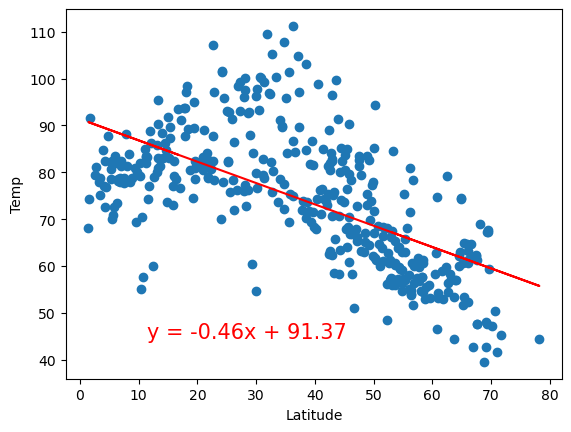

In [74]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_name = "Latitude"
y_name = "Temp"

plot_linear_regression(x_values, y_values)


The r-value is: 0.7911498211473343


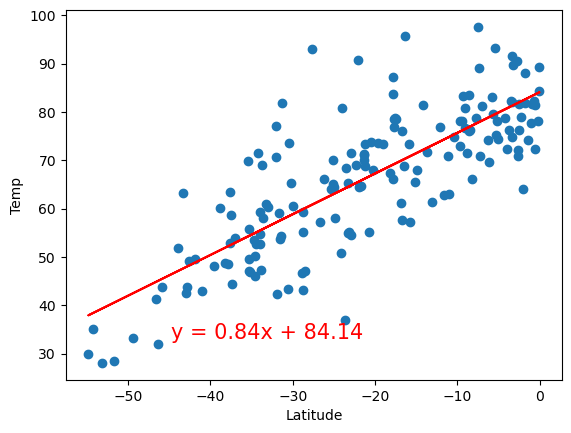

In [75]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_name = "Latitude"
y_name = "Temp"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** There is a very strong correlation between latitude and temperature. The cities closer to the equator have higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08643119431278955


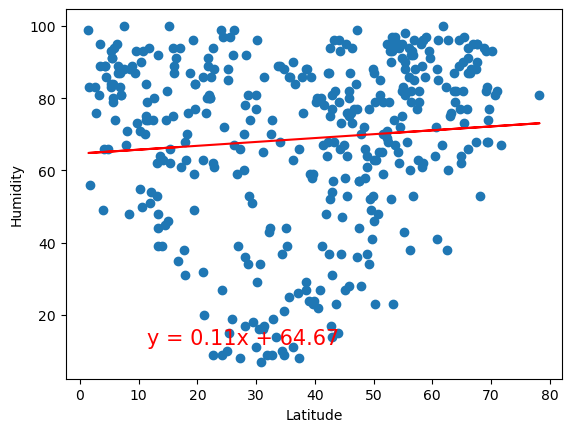

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_name = "Latitude"
y_name = "Humidity"
plot_linear_regression(x_values, y_values)

The r-value is: -0.12472305204622376


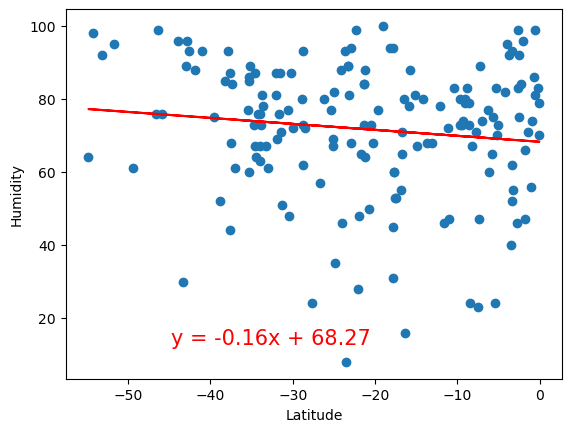

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_name = "Latitude"
y_name = "Humidity"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** There is a very small correlation. Cities closer to the equator have slightly less humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07685292001074759


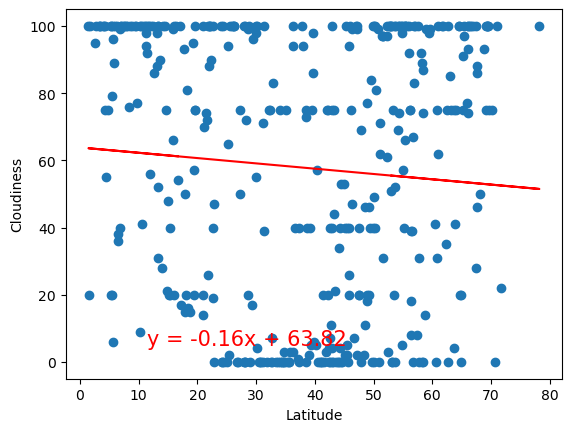

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_name = "Latitude"
y_name = "Cloudiness"
plot_linear_regression(x_values, y_values)

The r-value is: -0.17064500608460803


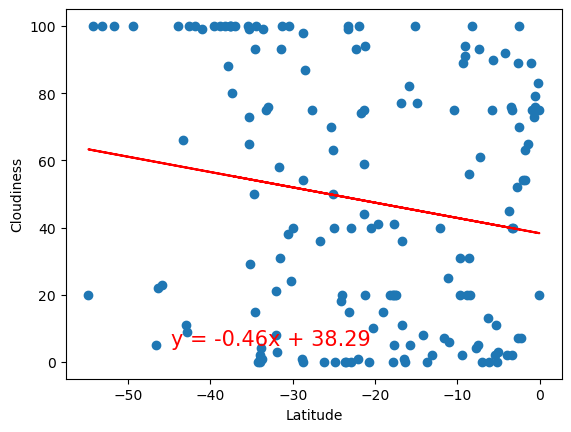

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_name = "Latitude"
y_name = "Cloudiness"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** The northern hemisphere has very little correlation between cloudiness and latitude, but the southern hemisphere seems to have a very slight correlation. It's slightly cloudier toward the south pole.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17908185500442497


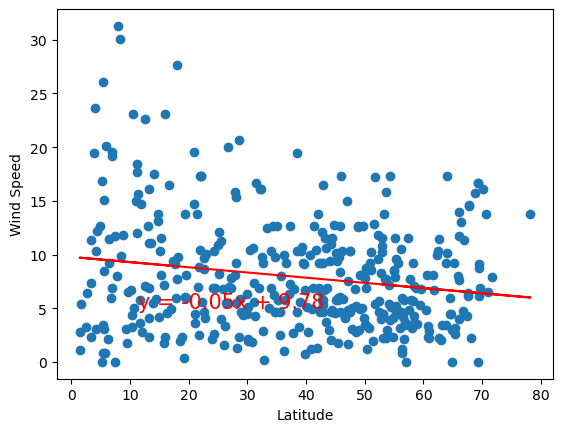

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_name = "Latitude"
y_name = "Wind Speed"
plot_linear_regression(x_values, y_values)

The r-value is: -0.16989063370682883


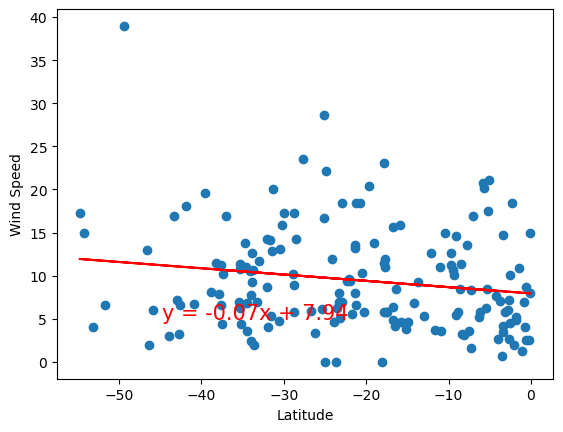

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_name = "Latitude"
y_name = "Wind Speed"
plot_linear_regression(x_values, y_values)


**Discussion about the linear relationship:** There is very little correlation, but it seems that the northern hemisphere is slightly windier closer to the equator and the southern hemisphere is slightly windier further away from the equator.